In [1]:
import sys
sys.path.append("../src/")
import re
import random
import math
from collections import OrderedDict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PFEmodules import *
# For help on the stuff available in the PFEmodules: (uncomment to see help page)
#help(frequency)
#help(student)
#help(counters)
#help(distribution)
#help(fn)
pd.options.display.max_columns = 100 

### Study of omnivorism among student cohorts

In [2]:
df = pd.read_csv("../data/data-prepped.csv")
df.drop(columns="Unnamed: 0", inplace=True)
df_cat_prom=pd.read_csv("../data/df_cat_prom.csv")
df_cat_prom.drop(columns="Unnamed: 0", inplace=True)

In [3]:
df_cat_1995_2009 = df_cat_prom.loc[(df_cat_prom["PROMO"] >= 1995) & (df_cat_prom["PROMO"] <= 2009)]
df_cat_2010_2020 = df_cat_prom.loc[(df_cat_prom["PROMO"] >= 2010) & (df_cat_prom["PROMO"] <= 2020)]

Defining some technical functions useful for the next steps.

In [4]:
def make_series_noprom(frame):
    """
    Returns a list of dicts [{2A : x, 3A : ...}, {2A : z, 3A: x, ...}] for all promotions included in the frame input, taking all cats into account.
    input : frame, subframe of the general df with the promos we want to plot.
    """
    list_of_dicts = []
    for i in range(1,6):
        work_df = fn.category_slicer(frame, i)
        list_of_student_courses = []
        for code in work_df["CODELEV"]:
            student = Student(code, df)
            list_of_student_courses.append(student.count_courses_over_years())
        list_of_dicts.append(fn.omni_cat_avg(list_of_student_courses, plottable = True))
    return list_of_dicts


def concat_dicts(list_of_dict):
    """
    Takes a list of dicts, removes any dict which has only null values, combines them into one and sorts it by key.
    Input: list_of_dict: list of dicts
    """
    super_dict = OrderedDict()
    list_of_dict = [x for x in list_of_dict if not all(value == 0 for value in x.values())]
    for k in sorted(set(k for d in list_of_dict for k in d)):
        super_dict[k] = [d[k] for d in list_of_dict if k in d]
    return super_dict

def make_series(promotion):
    """
    Returns a list of dicts [{2A : x, 3A : ...}, {2A : z, 3A: x, ...}] based on a promotion, taking all cats into account.
    input : promotion, int.
    """
    list_of_dicts = []
    for i in range(1,6):
        interm_df = fn.category_slicer(df_cat_prom, i)
        work_df = fn.promo_slicer(interm_df, promotion)
        list_of_student_courses = []
        for code in work_df["CODELEV"]:
            student = Student(code, df)
            list_of_student_courses.append(student.count_courses_over_years())
        list_of_dicts.append(fn.omni_cat_avg(list_of_student_courses, plottable = True))
    return list_of_dicts

### Evolution of the omnivorism level among cohorts on the whole period
The graph below represents the number of courses taken by students of each category on each year (2nd, 3rd etc) for the following sets:
* All years
* Academic year 1997-1998 to 2008-2009
* Academic year 2009-2010 to 2019-2020

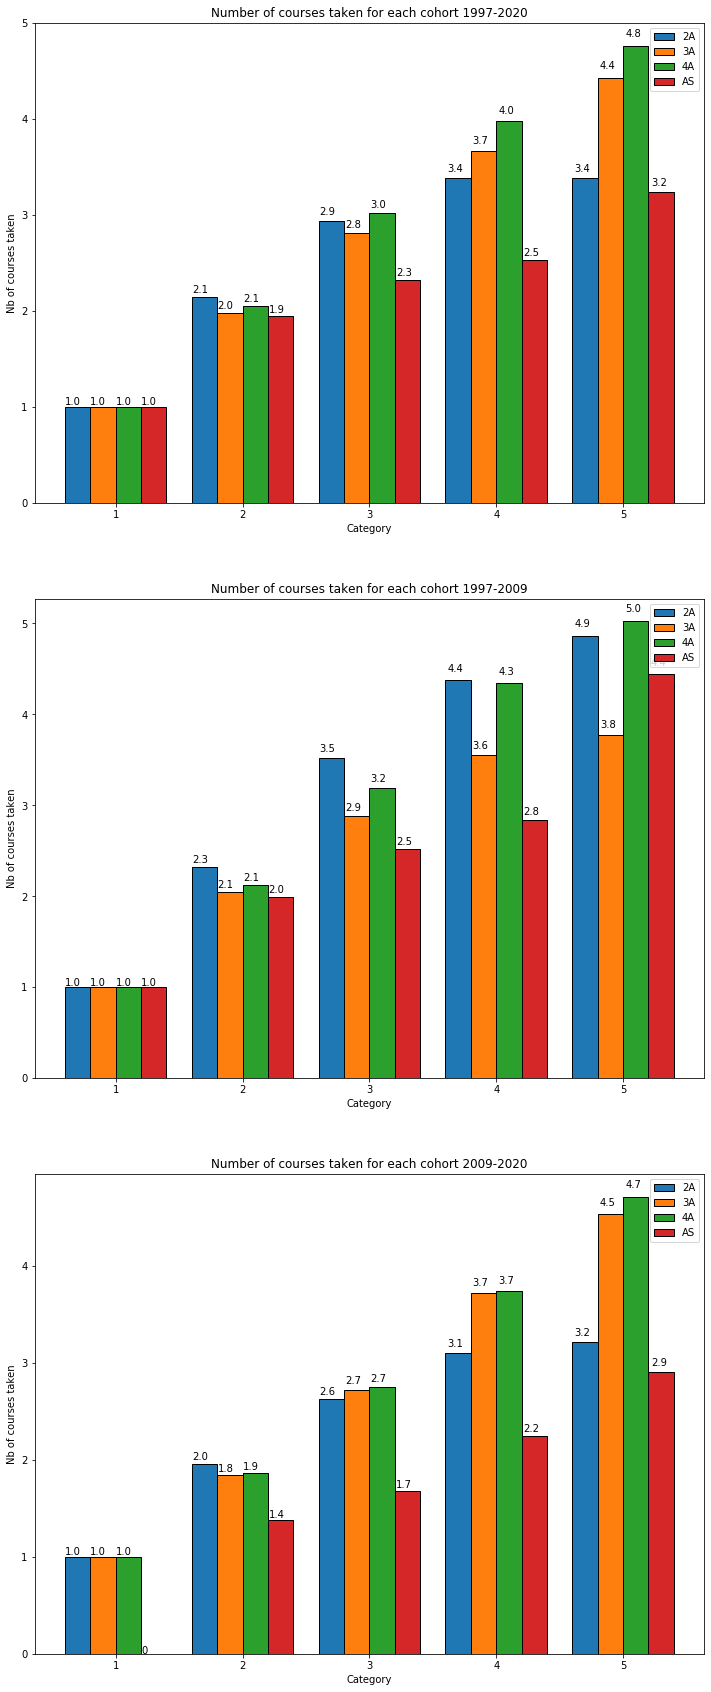

In [5]:
fig, axes = plt.subplots(3,1, figsize=(12,30))
y_d1 = make_series_noprom(df_cat_1995_2009)
z_d1 = concat_dicts(y_d1)
y_d2 = make_series_noprom(df_cat_2010_2020)
z_d2 = concat_dicts(y_d2)
y_all = make_series_noprom(df_cat_prom)
z_all = concat_dicts(y_all)
list_of_z = [z_all, z_d1, z_d2]
list_of_titles = ["1997-2020", "1997-2009", "2009-2020"]

for ax, z, title in zip(axes.flatten(), list_of_z, list_of_titles):
    fn.multi_numeric_plotter(z, ax)
    ax.set_title(f"Number of courses taken for each cohort {title}")
    ax.set_xticklabels(["","1","2","3","4","5"])
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),1)), (p.get_x()
                                            * 1.005, p.get_height() * 1.02))  

The graph below shows the detail of the number of courses taken by students of each category, on a specific year (2nd, 3rd...) on a given academic year, starting year 1997-1998.

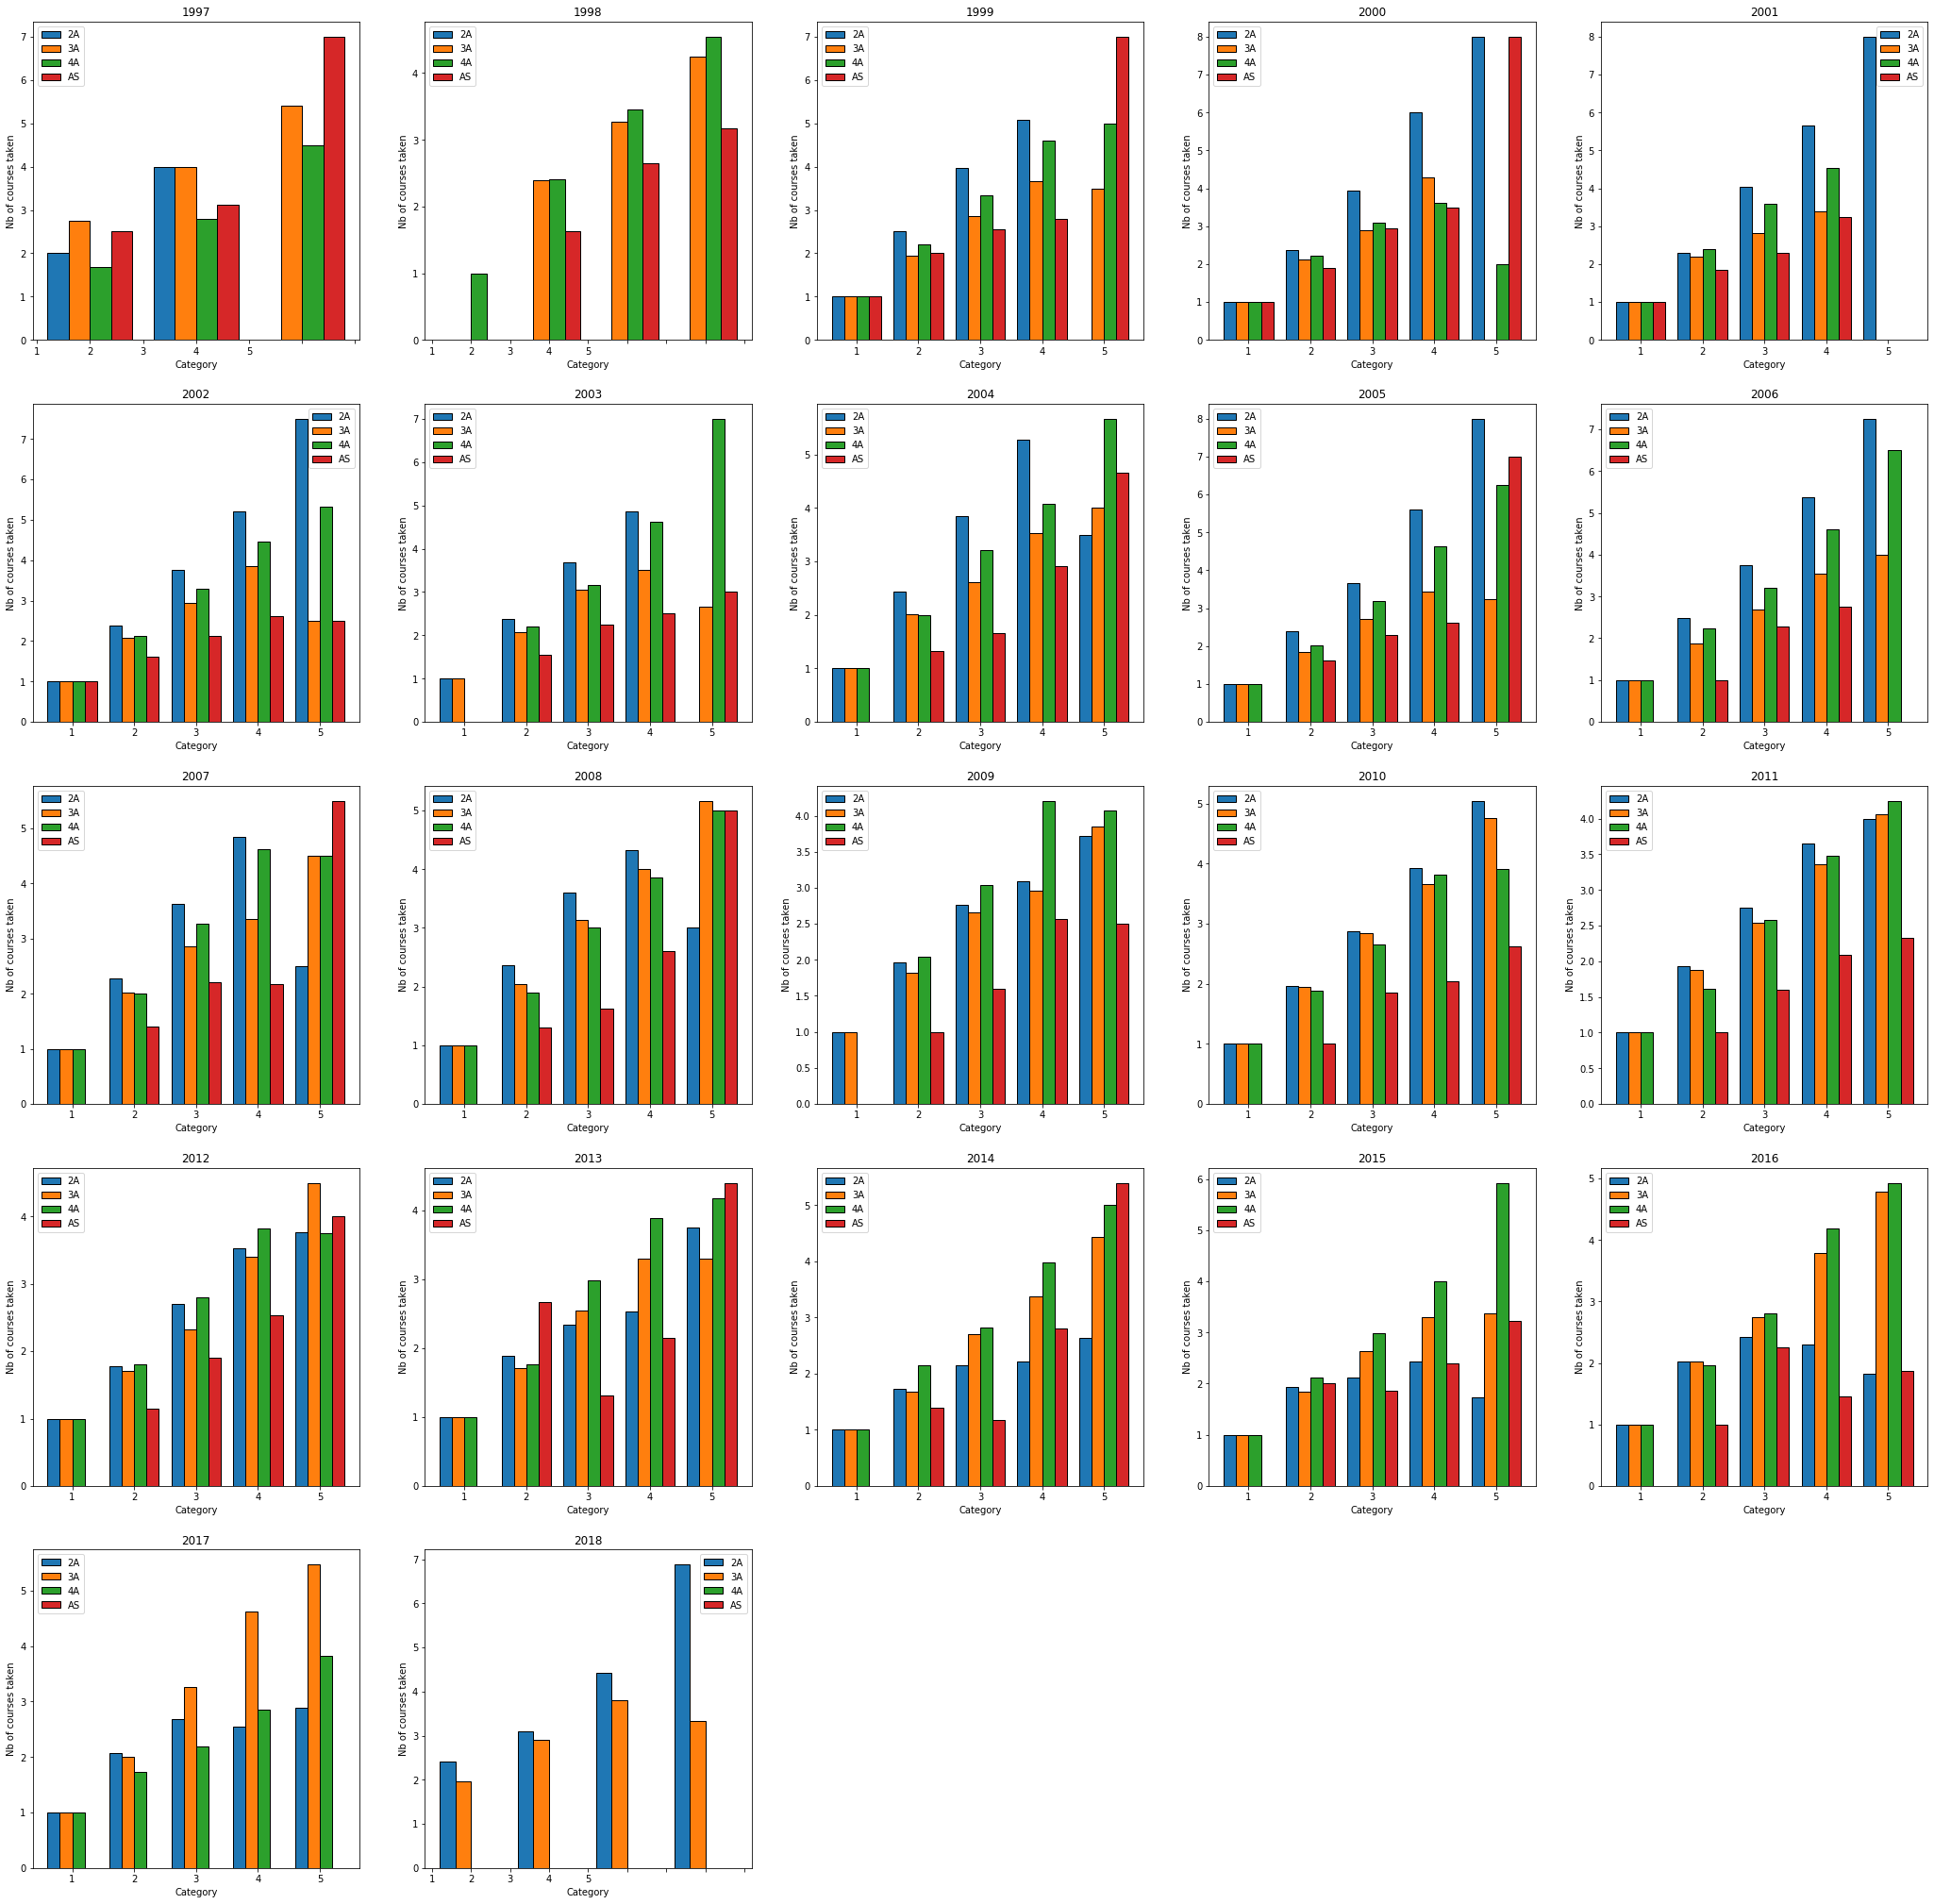

In [6]:
fig, axes = plt.subplots(5,5, figsize=(36,36))
years = range(1997, 2019)
j = 25
for year, ax in zip(years, axes.flatten()):
    y = make_series(year)
    z = concat_dicts(y)
    fn.multi_numeric_plotter(z, ax)
    ax.set_title(f"{year}")
    ax.set_xticklabels(["","1","2","3","4","5"])
nb_of_extras_graph = 3
for i in range(25, 25-nb_of_extras_graph, -1):
    axes.flat[i-1].set_visible(False)